In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop('Cabin', axis=1, inplace=True)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
mean_fare = df['Embarked'].mode()[0]
df['Embarked'].fillna(mean_fare, inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [13]:
from sklearn.preprocessing import LabelEncoder
#convert categorical features in numerical one.
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [15]:
#drop irrelevant features.
df.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
df.shape

(891, 8)

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
#seperate the target feature.
x=df.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
y=df.loc[:,'Survived']

In [20]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
# train the Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [24]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [25]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
print(accuracy_score(y_test,y_pred))

0.8444444444444444


In [27]:
#data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

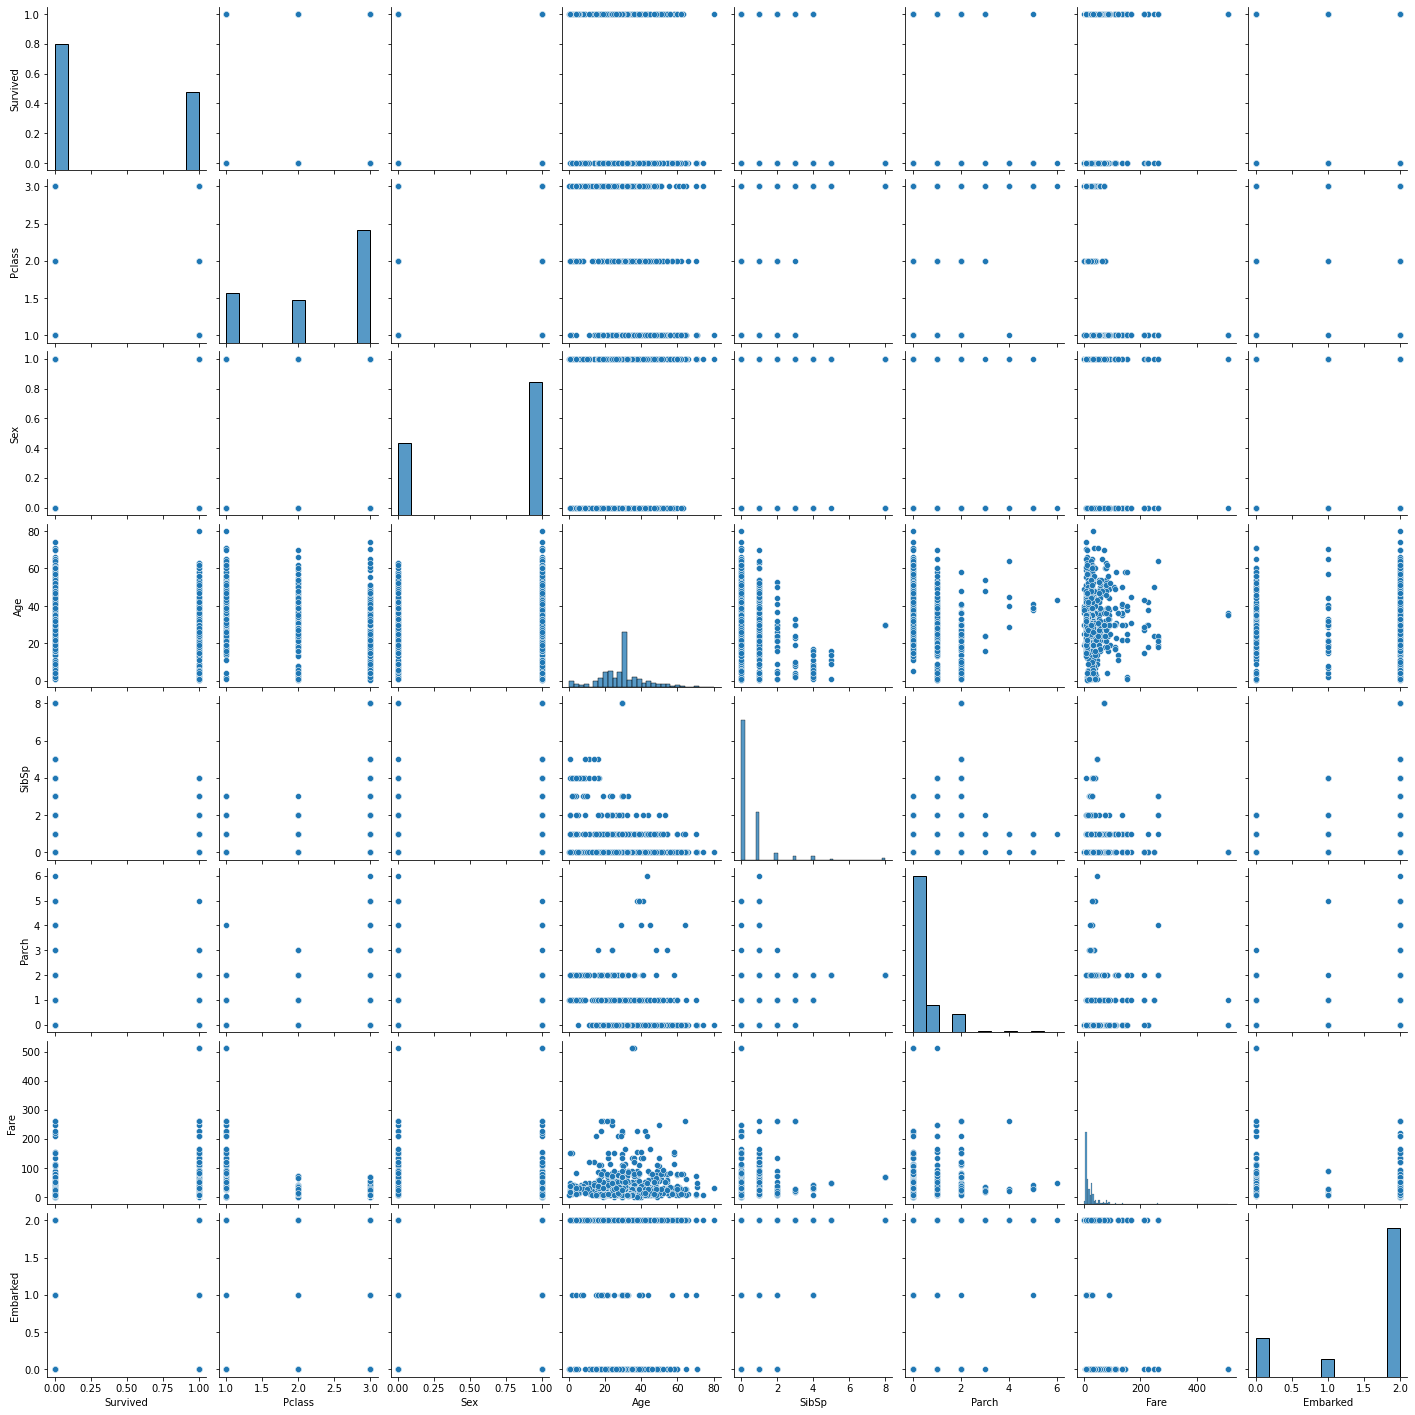

In [28]:
sns.pairplot(df)
plt.show()

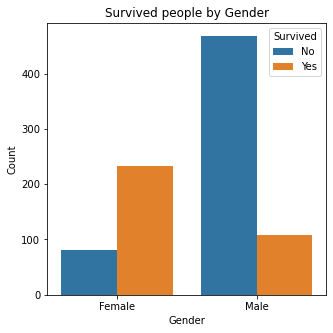

In [29]:
# Comparing Survived People by Gender to Total Number of People.
plt.figure(figsize=(5,5))
count_plot = sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survived people by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
count_plot.set_xticklabels(["Female", "Male"])
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

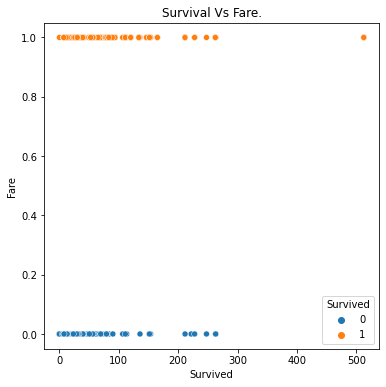

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df['Fare'],y=df['Survived'], hue=df['Survived'])
plt.title('Survival Vs Fare.')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [31]:
gender_mapping = {0:'Female', 1:'Male'}
df['Survived'] = df['Survived'].map(gender_mapping)
df['Survived'].value_counts()

Female    549
Male      342
Name: Survived, dtype: int64

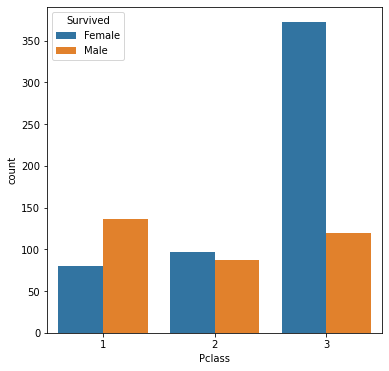

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Pclass'], hue=df['Survived'])
plt.show()

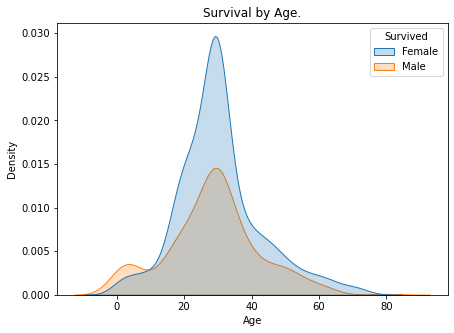

In [33]:
plt.figure(figsize=(7, 5))
sns.kdeplot(x=df["Age"], hue=df["Survived"], fill=True)
plt.title("Survival by Age.")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

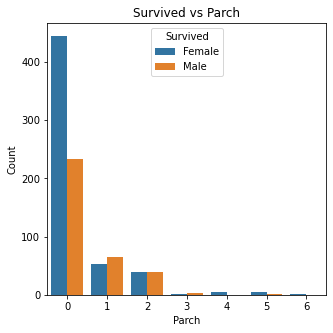

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Parch'], hue=df['Survived'])
plt.title("Survived vs Parch")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.show()

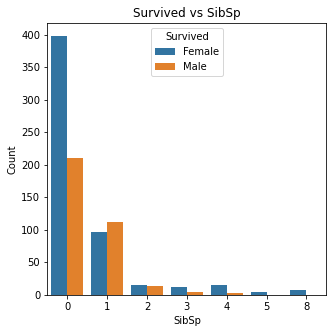

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['SibSp'], hue=df['Survived'])
plt.title("Survived vs SibSp")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.show()

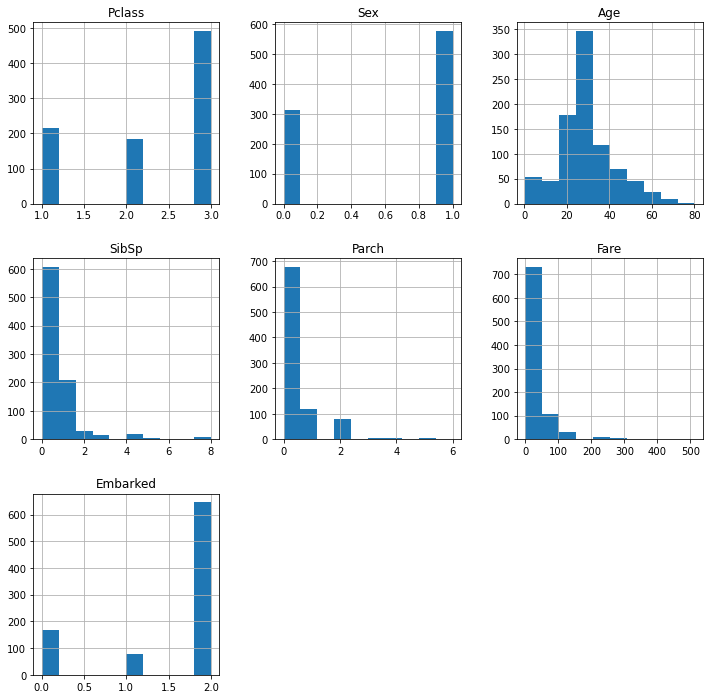

In [37]:
df.hist(figsize=(12,12))
plt.show()